# Bildsegmentierung
Bildsegmentierung ist der Prozess, ein Bild in mehrere Regionen zu unterteilen. 

Siehe auch
* [Bildmanipulation und -verarbeitung mit Numpy und Scipy von Emmanuelle Gouillart und Gaël Varoquaux](https://scipy-lectures.org/advanced/image_processing/index.html#basic-image)
* [Tutorial zur Bildsegmentierung mit scikit-image](https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html)

Beginnen wir erneut damit, ein Bild als zweidimensionales Array zu definieren und es mit pyclesperanto zu visualisieren.

In [1]:
import numpy as np
from pyclesperanto_prototype import imshow
import matplotlib.pyplot as plt

In [2]:
image = np.asarray([
    [1, 0, 2, 1, 0, 0, 0],
    [0, 3, 1, 0, 1, 0, 1],
    [0, 5, 5, 1, 0, 1, 0],
    [0, 6, 6, 5, 1, 0, 2],
    [0, 0, 5, 6, 3, 0, 1],
    [0, 1, 2, 1, 0, 0, 1],
    [1, 0, 1, 0, 0, 1, 0]
])

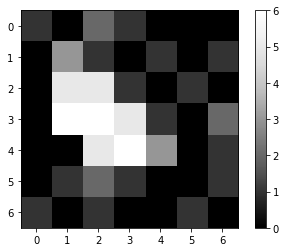

In [3]:
imshow(image, colorbar=True)

## Binäre Bilder
Die grundlegendste Art der Segmentierung ist die Binarisierung, bei der das Bild in eine "positive" und eine "negative" Region umgewandelt wird. Typischerweise werden dafür binäre Bilder verwendet, die zum Beispiel zwei verschiedene Pixelwerte `True` und `False` enthalten können, die jeweils "positiv" und "negativ" repräsentieren. Technisch gesehen kann jedes Bild als binäres Bild interpretiert werden, indem man die Logik anwendet: "Jeder Pixel wird als positiv betrachtet, der weder `False` noch `0` ist."

## Bildschwellenwertverfahren
Ein sehr grundlegender Algorithmus zur Trennung von Regionen niedriger Intensität von Regionen hoher Intensität im Bild ist das Schwellenwertverfahren.
Wir werden jetzt ein neues Bild erstellen, das `True` und `False` als Pixelwerte enthält, abhängig davon, ob das ursprüngliche Bild eine Intensität unter oder über einem gegebenen Schwellenwert hatte. Da dieses Bild nur zwei verschiedene Pixelwerte hat, ist es ein binäres Bild:

In [4]:
threshold = 4

binary_image = image > threshold

In [5]:
binary_image

array([[False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False,  True,  True, False, False, False, False],
       [False,  True,  True,  True, False, False, False],
       [False, False,  True,  True, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

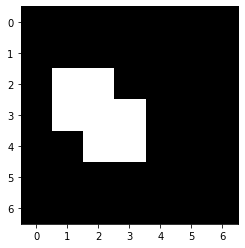

In [6]:
imshow(binary_image)

[Matplotlib](https://matplotlib.org/) könnte flexibler sein bei der Visualisierung von Bildern, z.B. zum Zeichnen von Umrissen um Regionen von Interesse:

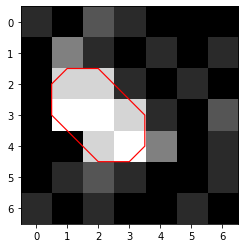

In [7]:
# Erstelle einen neuen Plot
fig, axes = plt.subplots(1,1)

# Füge zwei Bilder hinzu
axes.imshow(image, cmap=plt.cm.gray)
axes.contour(binary_image, [0.5], linewidths=1.2, colors='r')